# Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

# Carregamento dos dataset de resultados

In [43]:
#usuario= "igorcapeletti"
usuario= "igorubuntu"

raiz= f"/home/{usuario}/github/tcc_eBPF_XDP/graficos"

#pasta de resultados gerais para programas eBPF: ----------------
#pasta_resultado_ebpf= 'resultados1'
#pasta_resultado_ebpf= 'resultados2'
pasta_resultado_ebpf= 'resultados3'
#pasta_resultado_ebpf= 'resultados4'
raiz_ebpf= f"/home/{usuario}/github/tcc_eBPF_XDP/experimentos/{pasta_resultado_ebpf}"


#pasta de resultados gerais para programas AF_XDP: ----------------
#pasta_resultado_af_xdp= 'resultados_af_xdp1'
pasta_resultado_af_xdp= 'resultados_af_xdp2'
raiz_af_xdp= f"/home/{usuario}/github/tcc_eBPF_XDP/experimentos/{pasta_resultado_af_xdp}"


#carregamento dos arquivos CSV dos resultados dos programas eBPF e AF_XDP: ----------------
df_sar_ebpf = pd.read_csv(f'{raiz_ebpf}/resultado_geral_sar.csv', sep=',', engine='python')
df_sar_af_xdp = pd.read_csv(f'{raiz_af_xdp}/resultado_geral_sar.csv', sep=',', engine='python')

#normalizacao dos dados af_xdp
df_sar_af_xdp['hook_ebpf']= df_sar_af_xdp['hook_ebpf'].replace('xdpgeneric','af_xdp')

#concatenação dos dataframes referentes a cada analise (ebpf+af_xdp)
df_sar= pd.concat([df_sar_ebpf,df_sar_af_xdp], sort = False)

In [44]:
lista_combined= [1,2,4,8]

lista_for= ['for_0_a_0','for_0_a_1','for_0_a_100','for_0_a_200','for_0_a_400','for_0_a_800','for_0_a_1600','for_0_a_3200','for_0_a_6400','for_0_a_12800']
lista_alias_for= ['0','1','100','200','400','800','1600','3200','6400','12800']

lista_hook_xdp= ['xdpgeneric','xdpdvr','af_xdp']

lista_pacotes= [64,128,256,512,1024,1500]
lista_alias_pacotes= ['64B','128B','256B','512B','1024B','1500B']

lista_tipo_programa= ['ebpf','af_xdp']

# Normalização dos datasets

In [45]:
#antes de executar isso, eliminar ultima coluna dos arquivos perf que estão em branco

colunas= ['combined', 'algoritmo', 'packet_size', 'hook_ebpf', 'cpu', 'soft']
df_sar= df_sar[colunas]

df_sar['hook_ebpf']= df_sar['hook_ebpf'].replace('af_xdp','AF_XDP')
df_sar['hook_ebpf']= df_sar['hook_ebpf'].replace('xdpgeneric','Generic')
df_sar['hook_ebpf']= df_sar['hook_ebpf'].replace('xdpdrv','Native')

df_sar['algoritmo']= df_sar['algoritmo'].astype(str)
for i,j in zip(lista_for,lista_alias_for):
       df_sar['algoritmo']= df_sar['algoritmo'].replace(f'{i}',f'{j}')

df_sar['algoritmo']= df_sar['algoritmo'].astype(int)

df_sar = df_sar.rename(columns={'hook_ebpf': 'Modo XDP'})
df_sar = df_sar.rename(columns={'cpu': 'ID CPU'})

# Resultados para ***Uso de CPU***

In [46]:
format_imagens= '.pdf'
df_sar.head()

,combined,algoritmo,packet_size,Modo XDP,ID CPU,soft
0,4,800,128,Native,0,100.00
1,4,800,128,Native,1,100.00
2,4,800,128,Native,2,100.00
3,4,800,128,Native,3,100.00
4,4,800,128,Native,4,6.57


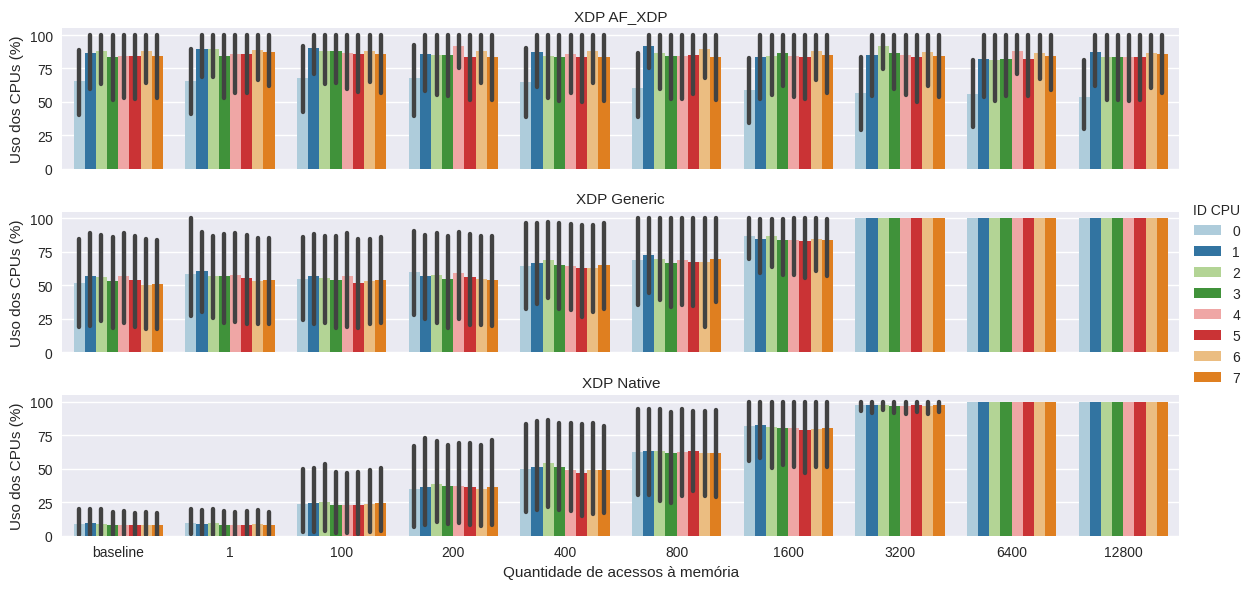

In [50]:
#Classificacao geral para todos os tamanhos de pacotes, cada combined para os diferentes hooks_ebpf

combined= 8
eixo_x= 'algoritmo'
eixo_y= 'soft'
hue= 'ID CPU'

plt.rc('figure', figsize=(5, 5))
df_sar= df_sar.sort_values(by=[eixo_x,hue,'Modo XDP'], ascending=True)       #ordena dados com os valores do eixo x

df= df_sar.copy()
df= df[df['ID CPU'] < 8]
df= df[df.combined == combined]
df = df.rename(columns={'hook_ebpf': 'Modo XDP'})

df['algoritmo']= df['algoritmo'].astype(str)
df['algoritmo']= df['algoritmo'].replace('0','baseline')

df.index= range(len(df))
grafico = sns.catplot(
    data=df, x=eixo_x, y=eixo_y,
    col='Modo XDP', hue=hue,
    kind="bar", palette='Paired', col_wrap=1,
    height= 2, aspect=12/2
)
grafico.set_ylabels("Uso dos CPUs (%)")
grafico.set_xlabels("Quantidade de acessos à memória")
grafico.set_titles("XDP {col_name}")

grafico.savefig(f'{raiz}/uso_CPU_{hue}_x_{eixo_x}@combined_{combined}_para_tudo{format_imagens}')

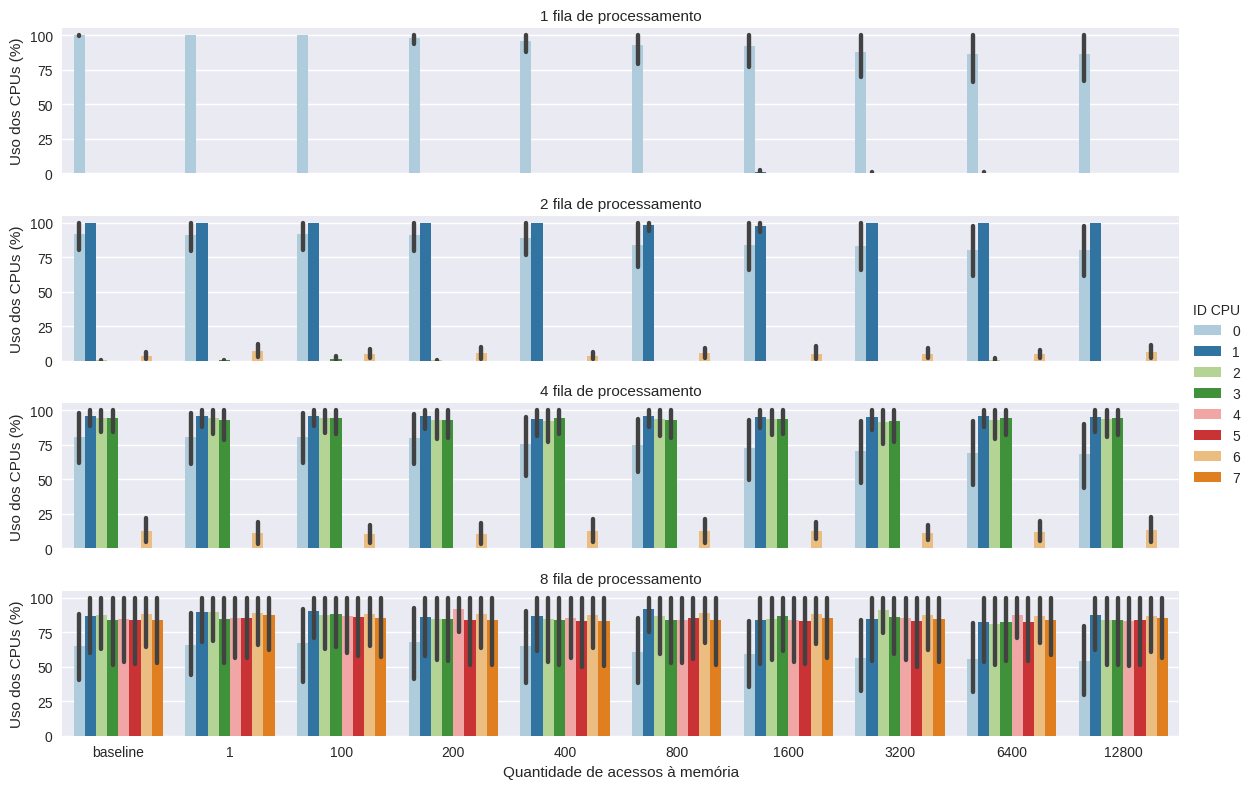

In [51]:
#Classificacao geral para todos os tamanhos de pacotes

hook_ebpf= 'AF_XDP'
#hook_ebpf= 'Generic'
#hook_ebpf= 'Native'

eixo_x= 'algoritmo'
eixo_y= 'soft'
hue= 'ID CPU'

plt.rc('figure', figsize=(5, 5))
df_sar= df_sar.sort_values(by=[eixo_x,hue], ascending=True)       #ordena dados com os valores do eixo x

df= df_sar.copy()
df= df[df['ID CPU'] < 8]
df= df[df['Modo XDP'] == hook_ebpf]                #filtra por algoritmo especifico

df['algoritmo']= df['algoritmo'].astype(str)
df['algoritmo']= df['algoritmo'].replace('0','baseline')

df.index= range(len(df))
grafico = sns.catplot(
    data=df, x=eixo_x, y=eixo_y,
    col='combined', hue=hue,
    kind="bar", palette='Paired', col_wrap=1,
    height= 2, aspect=12/2
)
grafico.set_ylabels("Uso dos CPUs (%)")
grafico.set_xlabels("Quantidade de acessos à memória")
grafico.set_titles("{col_name} fila de processamento")

grafico.savefig(f'{raiz}/uso_CPU_{hue}_x_{eixo_x}@hook_ebpf_{hook_ebpf}{format_imagens}')

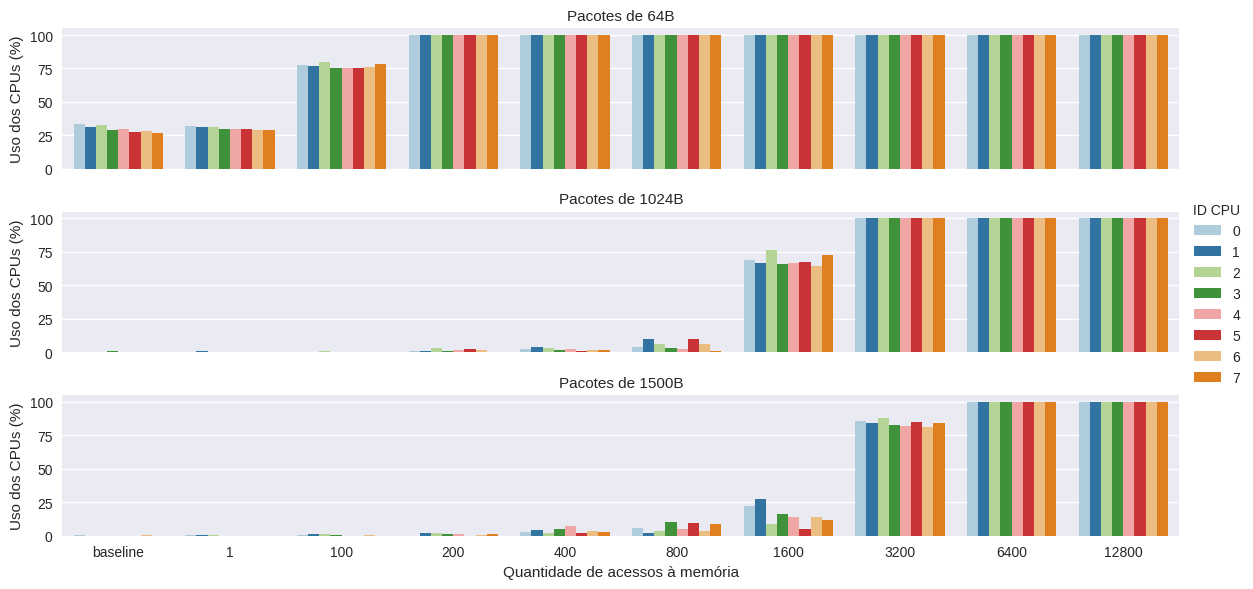

In [52]:
#Classificacao geral para todos os pacotes de 64, 1024 e 1500

#hook_ebpf= 'AF_XDP'
#hook_ebpf= 'Generic'
hook_ebpf= 'Native'
combined= 8

eixo_x= 'algoritmo'
eixo_y= 'soft'
hue= 'ID CPU'

plt.rc('figure', figsize=(5, 5))
df_sar= df_sar.sort_values(by=[eixo_x,hue], ascending=True)       #ordena dados com os valores do eixo x

df= df_sar.copy()
df= pd.concat([df[df.packet_size == 64], df[df.packet_size == 1024], df[df.packet_size == 1500]], sort = False)
df= df[df['ID CPU'] < 8]
df= df[df['Modo XDP'] == hook_ebpf]                #filtra por algoritmo especifico
df= df[df['combined'] == combined]

df['algoritmo']= df['algoritmo'].astype(str)
df['algoritmo']= df['algoritmo'].replace('0','baseline')

df.index= range(len(df))
grafico = sns.catplot(
    data=df, x=eixo_x, y=eixo_y,
    col='packet_size', hue=hue,
    kind="bar", palette='Paired', col_wrap=1,
    height= 2, aspect=12/2
)
grafico.set_ylabels("Uso dos CPUs (%)")
grafico.set_xlabels("Quantidade de acessos à memória")
grafico.set_titles("Pacotes de {col_name}B")

grafico.savefig(f'{raiz}/uso_CPU_{hue}_x_{eixo_x}@hook_ebpf_{hook_ebpf}_combined_{combined}{format_imagens}')

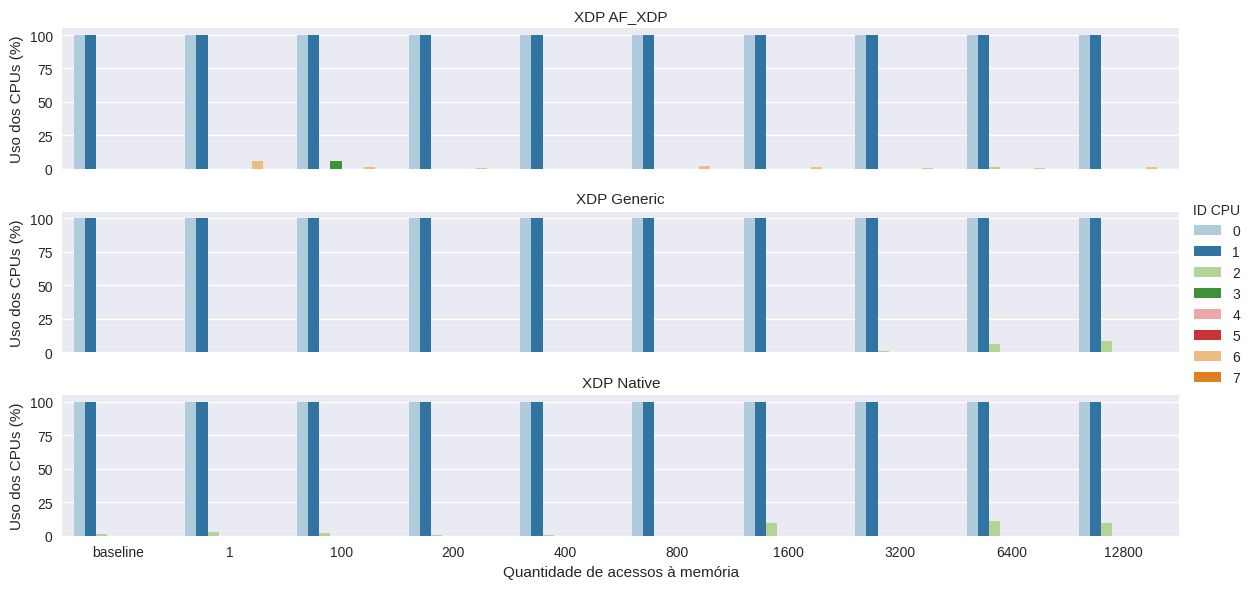

In [57]:
#Classificacao geral para todos hooks variando os pacotes de 64, 1024 e 1500

combined= 8
packet_size= 64

eixo_x= 'algoritmo'
eixo_y= 'soft'
hue= 'ID CPU'

plt.rc('figure', figsize=(5, 5))
df_sar= df_sar.sort_values(by=[eixo_x,hue,'Modo XDP'], ascending=True)       #ordena dados com os valores do eixo x

df= df_sar.copy()
df= df[df['ID CPU'] < 8]
df= df[df['packet_size'] == packet_size]                #filtra por pacote especifico
df= df[df['combined'] == combined]

df['algoritmo']= df['algoritmo'].astype(str)
df['algoritmo']= df['algoritmo'].replace('0','baseline')

df.index= range(len(df))
grafico = sns.catplot(
    data=df, x=eixo_x, y=eixo_y,
    col='Modo XDP', hue=hue,
    kind="bar", palette='Paired', col_wrap=1,
    height= 2, aspect=12/2
)
grafico.set_ylabels("Uso dos CPUs (%)")
grafico.set_xlabels("Quantidade de acessos à memória")
grafico.set_titles("XDP {col_name}")

grafico.savefig(f'{raiz}/uso_CPU_{hue}_x_{eixo_x}@packet_size_{packet_size}_combined_{combined}{format_imagens}')